<a href="https://colab.research.google.com/github/vjhwong/Statistical-Machine-Learning-1RT700/blob/main/SML_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from IPython.display import display
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.model_selection as skl_ms
import sklearn.metrics as skl_me
import sklearn.ensemble as skl_ens
import graphviz
drive.mount('/content/drive')   

# Try a quadratic logistic regression

# x = [x1, x2]
#x_prime = [x1, x2, x1^2, x2^2, x1x2]
#Try L1 regularization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




**Load the file and display the data**

In [ ]:
file_path = '/content/drive/My Drive/train (1).csv'
df = pd.read_csv(file_path)
display(df) 

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,761,174.0,43.200000,31.000000,46.0,24.0,Male
1035,632,8404,1952.0,187,6,1992,2,5820,172.0,37.166667,24.000000,21.0,34.0,Female
1036,1326,2750,877.0,356,2,2000,3,547,53.0,27.500000,27.666667,28.0,25.0,Male
1037,462,3994,775.0,52,8,1996,3,2757,32.0,42.857143,38.500000,29.0,32.0,Female


In [ ]:
df.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

**Do men or women dominate speaking roles in Hollywood movies?**

In [ ]:
value_counts = df["Lead"].value_counts()
print(value_counts)

Male      785
Female    254
Name: Lead, dtype: int64


**Has gender balance in speaking roles changed over time (i.e. years)?**

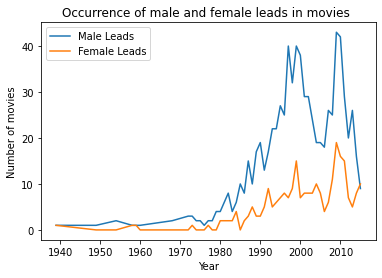

In [ ]:
occurrences = df.groupby(['Year', 'Lead']).size().unstack()
occurrences = occurrences.fillna(0)

# Create an array with the years sorted
years = df["Year"].unique()
years.sort()

# Create array with occurence of male and female leads respectively
male_leads = occurrences.Male.values
female_leads = occurrences.Female.values

plt.plot(years, male_leads, label="Male Leads")
plt.plot(years, female_leads, label="Female Leads")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.title("Occurrence of male and female leads in movies ")
plt.legend()
#display(occurrences)


**Do films in which men do more speaking make a lot more money than films in which womenspeak more?**

In [ ]:
# Total gross sum for movies with male leads and female leads
male_gross = df.query("Lead == 'Male'")['Gross'].mean()
female_gross = df.query("Lead == 'Female'")['Gross'].mean()

# Print
print(f"Average gross sum for movies with male leads: {round(male_gross, 2)}")
print(f"Average gross sum for movies with female leads: {round(female_gross, 2)}")
print(
    f"""Movies with male leads on average make {round(male_gross/female_gross, 2)} times more money than movies with female leads"""
)

Average gross sum for movies with male leads: 115.16
Average gross sum for movies with female leads: 98.74
Movies with male leads on average make 1.17 times more money than movies with female leads


**Average age of male and female leads**

In [ ]:
# Get average age of male and female leads
male_lead_age = df.query("Lead == 'Male'")["Age Lead"].mean()
female_lead_age = df.query("Lead == 'Female'")["Age Lead"].mean()
print(f"Average age of male leads: {round(male_lead_age, 2)}")
print(f"Average age of female leads: {round(female_lead_age, 2)}")

Average age of male leads: 40.16
Average age of female leads: 34.26


**Seaborne pairplot**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


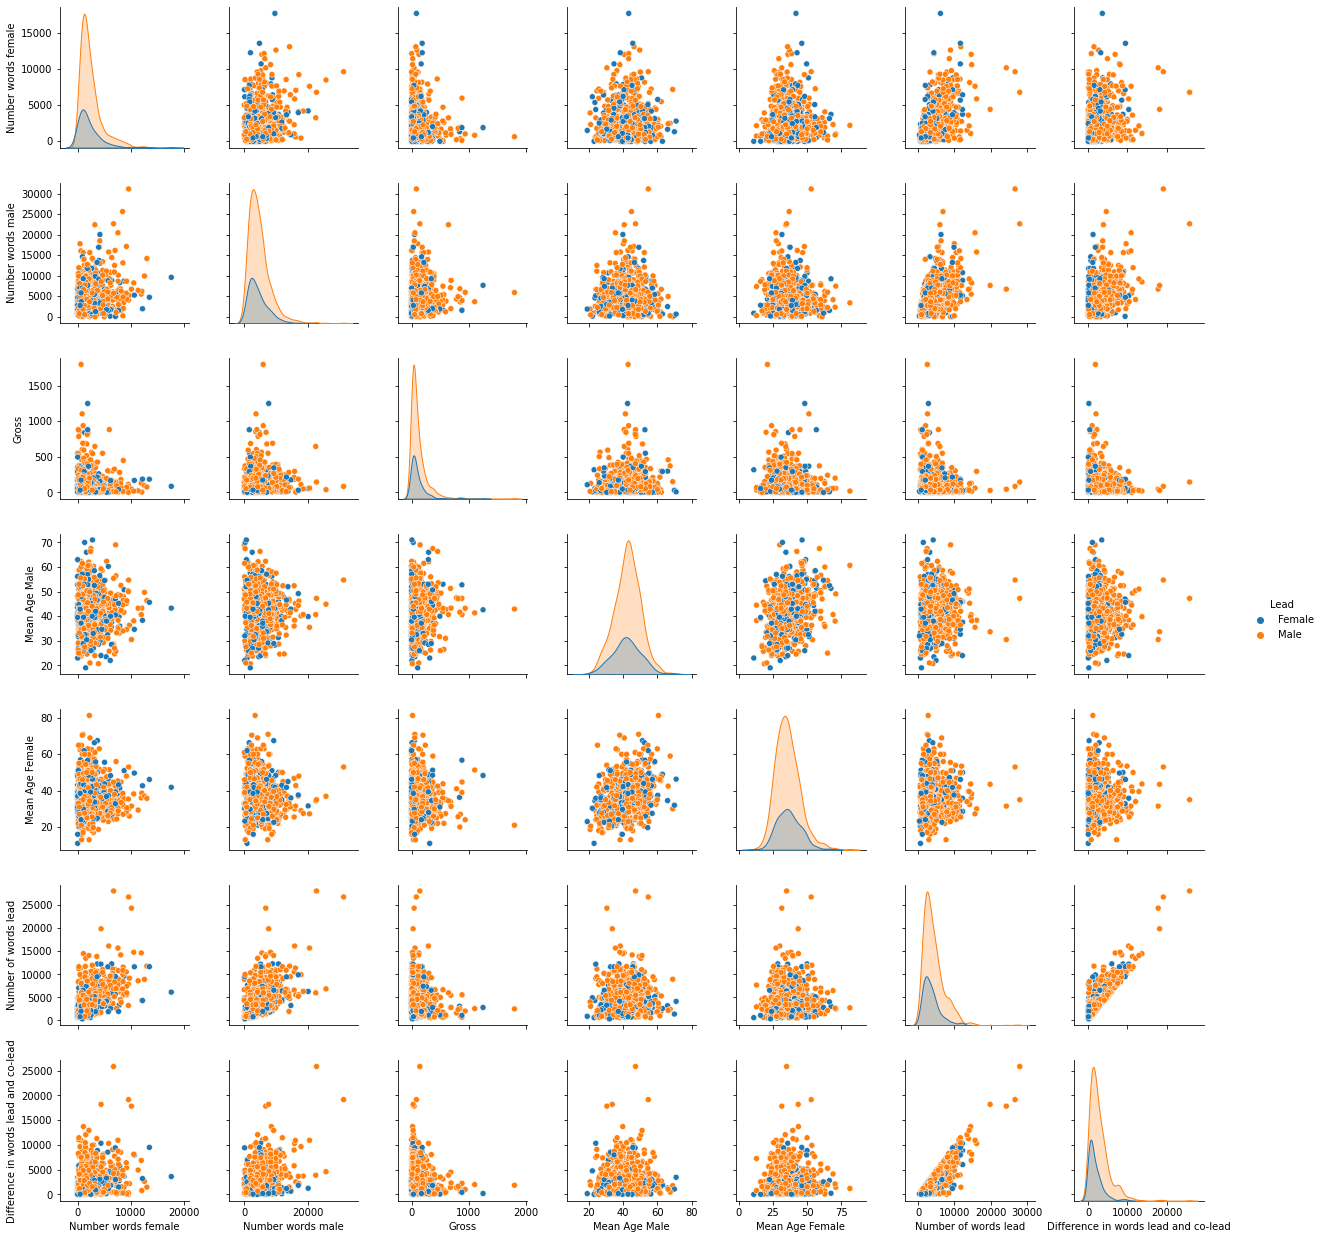

In [ ]:
study = ["Number words female", "Number words male", "Gross", "Mean Age Male", "Mean Age Female", "Number of words lead","Difference in words lead and co-lead", "Lead"]
sns.pairplot(df[study], size=2.5, hue="Lead")
plt.show()

In [ ]:
col_names_without_lead = list(df.columns)
col_names_without_lead.remove("Lead")
print(col_names_without_lead)


['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']


**Feature engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#df["Ratio male to female actors"] = df["Number of male actors"] / df["Number of female actors"]
#df["Ratio male to female words"] = df["Number words male"] / df["Number words female"]
df[col_names_without_lead] = scaler.fit_transform(df[col_names_without_lead])



In [ ]:
display(df)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,-0.381349,-0.676591,-0.623279,-0.873668,-1.478906,-0.467462,0.715098,-0.565204,0.203383,1.170591,0.715272,0.593154,2.451143,Female
1,-0.375783,-0.326435,-0.700801,-0.522923,0.316168,0.109371,0.236061,0.197337,-0.488825,-0.413237,-0.736774,1.570354,-0.123416,Male
2,-1.010703,-1.002092,-1.062568,-0.695893,-0.196710,-3.063211,-1.201051,-0.434064,1.746018,0.018716,0.119561,0.593154,0.125734,Male
3,-0.584950,-0.168675,-0.224261,0.039229,1.085485,0.205509,-0.722014,0.228365,-0.607490,-0.912739,-1.611726,-0.465479,-1.036970,Male
4,-0.471787,-0.486691,-0.091703,0.249836,0.059729,-1.140434,0.236061,-0.593012,-0.469048,0.370678,1.013128,-0.221179,0.291835,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,-0.942063,-1.263021,-0.931016,-0.544144,-0.709588,-2.582517,-0.722014,-1.112594,0.414341,0.108306,-0.550615,0.593154,-0.953919,Male
1035,-0.789478,-0.381615,-0.723621,-0.936129,-0.453149,-0.755879,-0.722014,0.368287,0.401156,-0.663877,-1.332486,-1.442678,-0.123416,Female
1036,-0.467613,-1.211363,-1.084381,-0.868463,-1.478906,0.013232,-0.242976,-1.175236,-0.383346,-1.901076,-0.922934,-0.872645,-0.870869,Male
1037,-0.868321,-1.028801,-1.118612,-0.990182,0.059729,-0.371324,-0.242976,-0.528321,-0.521788,0.064425,0.287104,-0.791212,-0.289517,Female


In [ ]:
col_names_X = col_names_without_lead
col_names_X.remove('Number of words lead')
#col_names_X.remove("Number words male")
#col_names_X.remove("Difference in words lead and co-lead")
#X = df[col_names_without_lead]
# print(col_names_X)
X = df[col_names_X]
y = df["Lead"]

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 5}, cmap="blues")

ValueError: ignored

**K-Fold Cross validation to determine best n for Random Forest**

In [ ]:
# n_fold = 10

# cv = skl_ms.KFold(n_splits=n_fold, random_state=0, shuffle=True)
# K = np.arange(100, 150) # Use np.logspace, try extremes
# misclassification = np.zeros(len(K))
# for train_index, val_index in cv.split(X):
#   X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#   y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#   for j, k in enumerate(K):
#     model = skl_ens.RandomForestClassifier(n_estimators=k)
#     model.fit(X_train, y_train)
#     prediction = model.predict(X_val)
#     misclassification[j] += np.mean(prediction != y_val)

# misclassification /= n_fold
# plt.plot(K, misclassification)
# plt.title("Cross validation error for Random Forest Classifier")
# plt.xlabel("k")
# plt.ylabel("Validation error")
# plt.show()

In [ ]:
n_fold = 10

# Create LDA and QDA models and store in list
model_LDA = skl_da.LinearDiscriminantAnalysis()
model_QDA = skl_da.QuadraticDiscriminantAnalysis()
model_RandomForest = skl_ens.RandomForestClassifier(n_estimators=110)
models = [model_LDA, model_QDA, model_RandomForest]

# Initialize matrices to hold misclassifcation rate
misclassification_val = np.zeros((n_fold, len(models)))
misclassification_train = np.zeros((n_fold, len(models)))

# Initialize crossvalidator using KFold CV
cv = skl_ms.KFold(n_splits=n_fold, random_state=1, shuffle=True)

# Loop over the indices given på the split
for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  # For each model type, fit, predict and get misclassification rate
  for m in range(np.shape(models)[0]):
    model = models[m]
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    misclassification_train[i, m] = np.mean(model.predict(X_train) != y_train)
    misclassification_val[i, m] = np.mean(prediction != y_val)

In [ ]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')

In [ ]:
plt.boxplot(misclassification_val)
plt.title("Cross validation boxplot for LDA, QDA and Random Forest")
plt.xticks(np.arange(len(models))+1, ("LDA", "QDA", "Random Forest"))
plt.ylabel("Validation error")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = skl_ms.train_test_split(X, y, test_size=0.2, random_state=1)
le = skl_pre.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

**LDA**

In [ ]:
model_LDA = skl_da.LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train.ravel())
y_prob_LDA = model_LDA.predict_proba(X_test)[:, 1]
y_pred_LDA = np.where(y_prob_LDA > 0.5, 1, 0)
confusion_matrix_LDA = skl_me.confusion_matrix(y_test, y_pred_LDA)
confusion_matrix_LDA

In [ ]:
false_positive_rate_LDA, true_positive_rate_LDA, thresholds = skl_me.roc_curve(
    y_test, y_prob_LDA
    )
roc_auc_LDA = skl_me.auc(false_positive_rate_LDA, true_positive_rate_LDA)
print(f"AUC for LDA: {roc_auc_LDA:.2f}")

In [ ]:
F1_LDA = skl_me.f1_score(y_test, y_pred_LDA)
print(f"F1 score for LDA: {F1_LDA:.2f}")

In [ ]:
plot_roc(roc_auc_LDA, false_positive_rate_LDA, true_positive_rate_LDA)

**QDA**

In [ ]:
model_QDA = skl_da.QuadraticDiscriminantAnalysis()
model_QDA.fit(X_train, y_train.ravel())
y_prob_QDA = model_QDA.predict_proba(X_test)[:, 1]
y_pred_QDA = np.where(y_prob_QDA > 0.5, 1, 0)
confusion_matrix_QDA = skl_me.confusion_matrix(y_test, y_pred_QDA)
confusion_matrix_QDA

In [ ]:
false_positive_rate_QDA, true_positive_rate_QDA, thresholds = skl_me.roc_curve(
    y_test, y_prob_QDA
    )
roc_auc_QDA = skl_me.auc(false_positive_rate_QDA, true_positive_rate_QDA)

print(f"AUC for QDA: {roc_auc_QDA:.2f}")

In [ ]:
F1_QDA = skl_me.f1_score(y_test, y_pred_QDA)
print(f"F1 score for QDA: {F1_QDA:.2f}")

In [ ]:
plot_roc(roc_auc_QDA, false_positive_rate_QDA, true_positive_rate_QDA)

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Receiver Operating Characteristics')
plt.plot(false_positive_rate_LDA, true_positive_rate_LDA, color='green', label='LDA AUC = {:.2f}'.format(roc_auc_LDA))
plt.plot(false_positive_rate_QDA, true_positive_rate_QDA, color='red', label='QDA AUC = {:.2f}'.format(roc_auc_QDA))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Random Forest**

**Quadratic Logistic Regression**